##### 3. Exploratory Data Analysis (EDA)

- 1 How does the distribution of startups vary across different states? (Location)
- 2 Which industry categories have the highest success rates among startups?? (Industries)
- 3 How does the total funding amount correlate with the success of startups? (Financial Backing)
- 4 Is there a correlation between the age of a startup and its success? (Maturity)
- 5 How do Relationships and Networking Impact Success? (Relationships)
- 6 How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [104]:
notebook_directory = '/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook'
file_path = os.path.join(notebook_directory, '..', 'data', 'startup.csv')
data = pd.read_csv(file_path, encoding="ISO-8859-1")

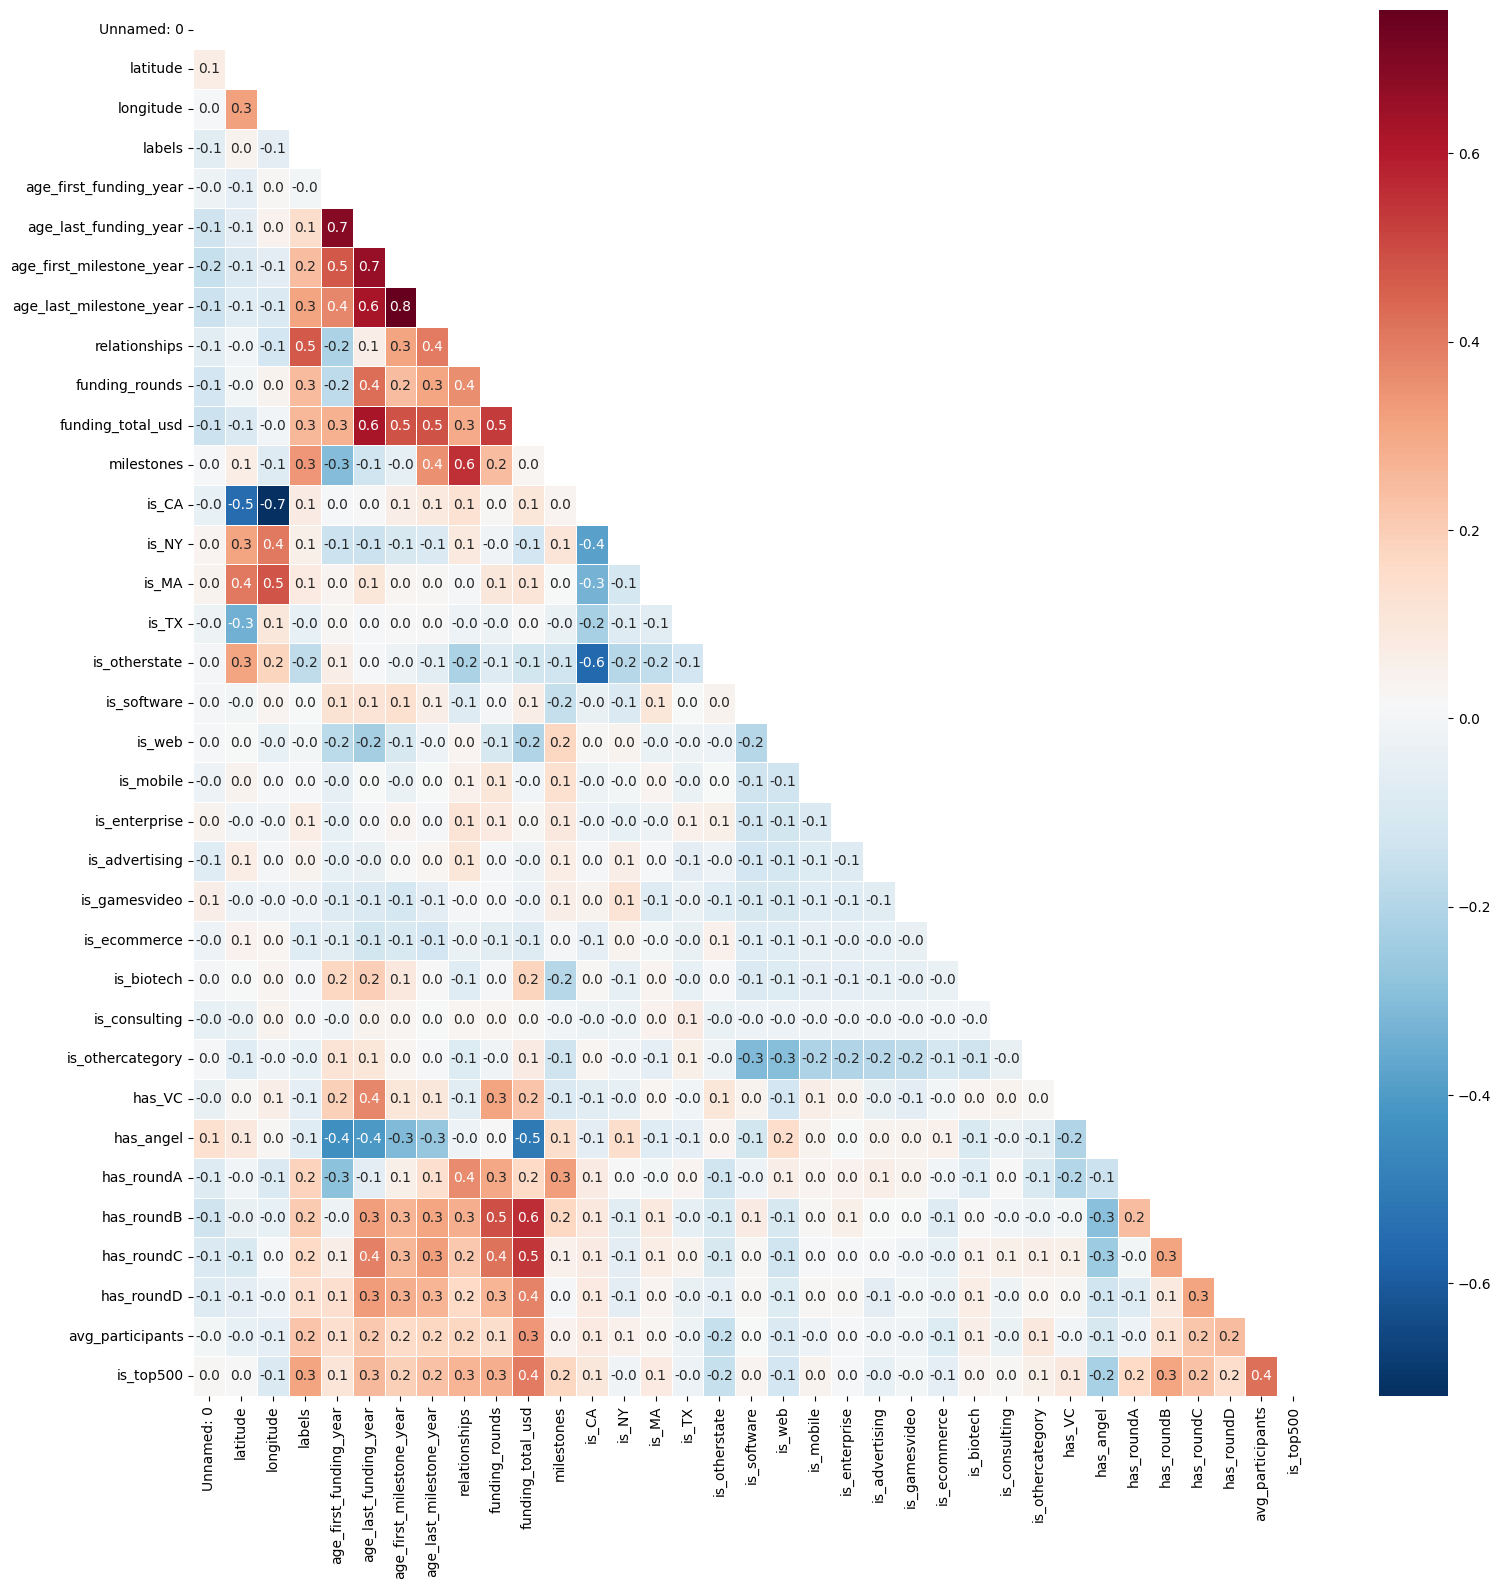

In [105]:
def draw_heatmap(data):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = data.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df_1 = data.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

 ##### 1. How does the distribution of startups vary across different states? (Location) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_17360/2773544925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")


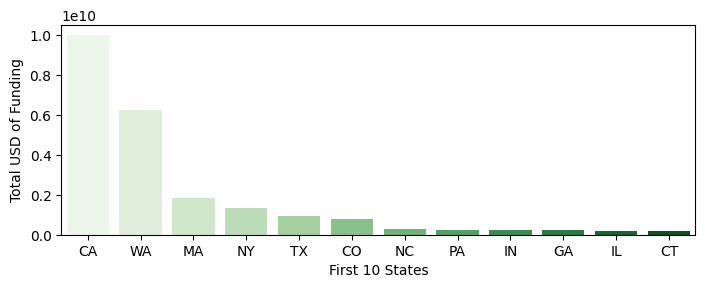

In [106]:
df_state = data.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(12)

plt.figure(figsize=(18, 6), dpi=100)
plt.subplot(2, 2, 1)
plt.ylabel("Total USD of Funding")
plt.xlabel("First 10 States")
sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")
plt.show()

##### 2. Which industry categories have the highest success rates among startups?? (Industries) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_17360/1682334162.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category_code", data=data, order=order, palette="pastel", legend=False)


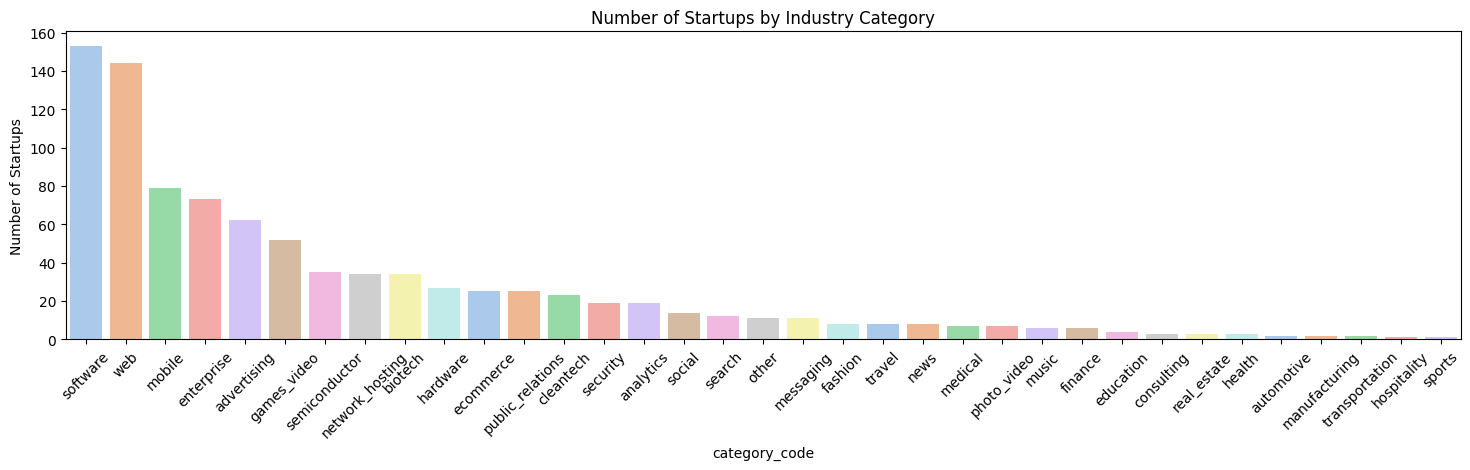

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
order = data["category_code"].value_counts().index

plt.figure(figsize=(18, 4), dpi=100)
plt.xticks(rotation=45)
plt.title("Number of Startups by Industry Category")

sns.countplot(x="category_code", data=data, order=order, palette="pastel", legend=False)
plt.ylabel("Number of Startups")
plt.show()

**Drop the irrelevant features from 48 columns**

In [108]:
clean_data = data.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
clean_data

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,acquired
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,acquired
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,acquired
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,acquired
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,advertising,0,0,1,0,0,0,6.0000,1,acquired
919,MA,Burlington,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,security,1,0,0,1,0,0,2.6667,1,closed
920,CA,Sunnyvale,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,biotech,0,0,0,0,0,1,8.0000,1,closed
921,CA,San Francisco,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,software,0,0,1,1,0,0,1.0000,1,acquired


 **General changes:*
 
 Columns deleted that provide too much granularity or doesnt represent meaningful information are the following: 
 
- "Unnamed: 0"
- "Latitude"
- "Longitude"
- "zip code"
- "id" 
- "name"
- all columns started by is 
  
It is also important to evaluate the redundancy of certain observations by looking for the presence of
duplicates:

- "Unnamed: 6"
- "state_code.1" 
- "object_id"
- "labels" : A numerical representation of the same information as 'status', drop it to avoid redundancy and potential confusion.

Only a few duplicate instances were found in the database and all were removed.

In [109]:
num_columns = len(clean_data.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 24 columns.


**Handle missing values**

The second step consists on eliminating noisy or unreliable data being the two most common cases
of inconsistencies, Missing Values and Outliers. 

A Missing value (or missing data) is a variable that has no data value stored in an observation. Missing values are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. 

In [110]:
x= clean_data.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
status                        0
dtype: int64

In [111]:
# 2. Impute missing values with 0 to 'age_first_milestone_year'
clean_data['age_first_milestone_year'].fillna(0, inplace=True)

# 3. Impute missing values with 0 to 'age_last_milestone_year'
clean_data['age_last_milestone_year'].fillna(0, inplace=True)

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

**Data Transformation**

In [112]:
clean_data['status'].value_counts()
#In a binary classification problem like predicting whether a startup 
#will be "acquired" or "closed," a balanced dataset typically means that you have a roughly equal 
#number of examples for each class. In your case, you have 597 examples of "acquired" and 326 examples of "closed."

status
acquired    597
closed      326
Name: count, dtype: int64

In [113]:
clean_data['status'] = clean_data.status.map({'acquired':1, 'closed':0})
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
5,CA,Mountain View,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,...,network_hosting,0,0,0,1,0,0,3.0000,1,0
6,CA,Mountain View,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,...,software,1,0,1,1,0,0,1.6667,1,1
7,CA,San Rafael,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,...,finance,0,0,1,1,0,1,3.5000,1,1
8,MA,Williamstown,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,...,mobile,1,0,1,0,0,1,4.0000,1,1
9,CA,Palo Alto,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,...,web,1,1,1,0,0,0,1.0000,1,1


Converting Datetime to Numerical values

- Following variables : 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'

In [114]:
import pandas as pd
# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of date columns
date_columns = ['founded_at','closed_at', 'first_funding_at', 'last_funding_at']

# Convert date columns to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Convert datetime to timestamp (numerical)
for date_column in date_columns:
    data_df[date_column] = data_df[date_column].astype(int)

In [115]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1167609600000000000,-9223372036854775808,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,946684800000000000,-9223372036854775808,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,1237334400000000000,-9223372036854775808,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1009843200000000000,-9223372036854775808,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
5,CA,Mountain View,1009843200000000000,1234656000000000000,1153180800000000000,1153180800000000000,4.5452,4.5452,5.0027,5.0027,...,network_hosting,0,0,0,1,0,0,3.0000,1,0
6,CA,Mountain View,1104537600000000000,-9223372036854775808,1158796800000000000,1268870400000000000,1.7205,5.2110,3.0000,6.6082,...,software,1,0,1,1,0,0,1.6667,1,1
7,CA,San Rafael,1072915200000000000,-9223372036854775808,1124841600000000000,1286150400000000000,1.6466,6.7616,5.6055,7.3616,...,finance,0,0,1,1,0,1,3.5000,1,1
8,MA,Williamstown,1009843200000000000,-9223372036854775808,1122940800000000000,1360281600000000000,3.5863,11.1123,8.0055,9.9945,...,mobile,1,0,1,0,0,1,4.0000,1,1
9,CA,Palo Alto,1117584000000000000,-9223372036854775808,1170288000000000000,1265328000000000000,1.6712,4.6849,2.9178,6.1151,...,web,1,1,1,0,0,0,1.0000,1,1


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [116]:
import pandas as pd

# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Create a function to generate mappings
def create_mapping(column):
    unique_values = clean_data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    clean_data[column] = clean_data[column].map(mapping)

In [117]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,0,0,1167609600000000000,-9223372036854775808,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,0,0,1,0,0,0,0,1.0000,0,1
1,0,1,946684800000000000,-9223372036854775808,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,1,1,0,0,1,1,1,4.7500,1,1
2,0,0,1237334400000000000,-9223372036854775808,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,2,0,0,1,0,0,0,4.0000,1,1
3,0,2,1009843200000000000,-9223372036854775808,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,3,0,0,0,1,1,1,3.3333,1,1
4,0,3,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,4,1,1,0,0,0,0,1.0000,1,0
5,0,4,1009843200000000000,1234656000000000000,1153180800000000000,1153180800000000000,4.5452,4.5452,5.0027,5.0027,...,5,0,0,0,1,0,0,3.0000,1,0
6,0,4,1104537600000000000,-9223372036854775808,1158796800000000000,1268870400000000000,1.7205,5.2110,3.0000,6.6082,...,3,1,0,1,1,0,0,1.6667,1,1
7,0,5,1072915200000000000,-9223372036854775808,1124841600000000000,1286150400000000000,1.6466,6.7616,5.6055,7.3616,...,6,0,0,1,1,0,1,3.5000,1,1
8,1,6,1009843200000000000,-9223372036854775808,1122940800000000000,1360281600000000000,3.5863,11.1123,8.0055,9.9945,...,7,1,0,1,0,0,1,4.0000,1,1
9,0,7,1117584000000000000,-9223372036854775808,1170288000000000000,1265328000000000000,1.6712,4.6849,2.9178,6.1151,...,2,1,1,1,0,0,0,1.0000,1,1


In [118]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (24):
['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']

Categorical Features (0):
[]

Target Variable (1):
['status']


##### 3. How does the total funding amount correlate with the success of startups? (Financial Backing) check

/Users/gabrielaarzate/.virtualenvs/fp/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gabrielaarzate/.virtualenvs/fp/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gabrielaarzate/.virtualenvs/fp/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gabrielaarzate/.virtualenvs/fp/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


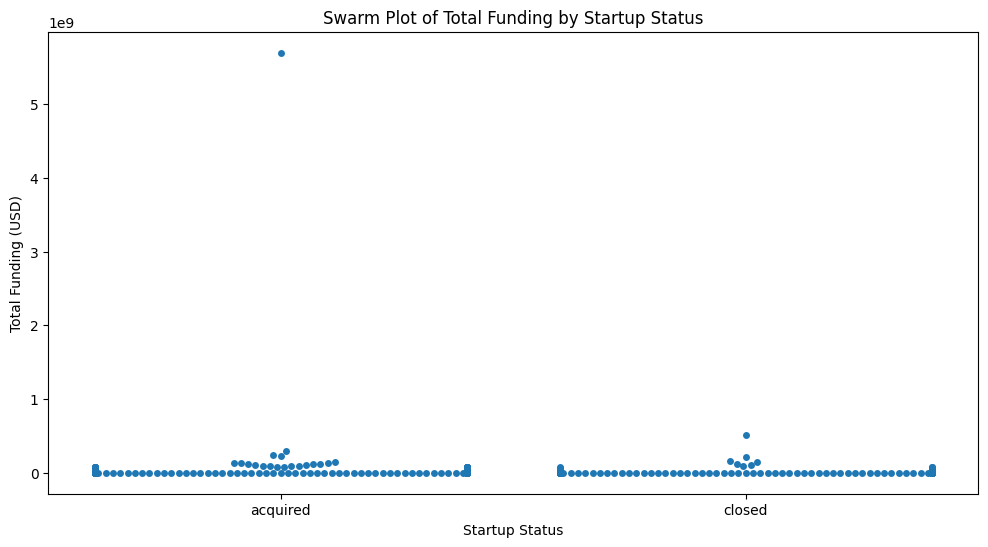

In [119]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='status', y='funding_total_usd', data=data)
plt.title('Swarm Plot of Total Funding by Startup Status')
plt.xlabel('Startup Status')
plt.ylabel('Total Funding (USD)')
plt.show()

##### 5. Is there a correlation between the age of a startup and its success? (Maturity)** need to add variable age 

##### 6. How do Relationships and Networking Impact Success? (Relationships)** check

##### 7. How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk.** check

Problem that I have today :
For the questions i want to answer in my article, I have this problem,





- In the first article( data exploration) I load the original data set because i wanted to do the 
visualization for the first questions this doesnt need data 
- I wanted to answer this questions, but some of the variable 
really need to be clean before doing the visualization, i could only answer 2 interesting questions.